In [2]:

# install.packages("hdf5r")
# BiocManager::install(c("biomaRt", "clusterProfiler", "ReactomePA", "org.Hs.eg.db", "org.Mm.eg.db", "ComplexHeatmap", "enrichplot", "EnhancedVolcano"))
# remotes::install_github("mjoppich/PLOSC")

library("Seurat")
library("PLOSC")


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:

files <- Sys.glob("T:/scdata/covid_sc_cellranger/h5files/*.h5")
inputMatrices = readH5Files(files, sample_element=5, sample_processor=function(x){return(substr(x, 1, 10))})


[1] "20094_0001 T:/scdata/covid_sc_cellranger/h5files/20094_0001_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0001"
[1] "20094_0001 36601 x 6794880 genes x cells"
[1] "20094_0002 T:/scdata/covid_sc_cellranger/h5files/20094_0002_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0002"
[1] "20094_0002 36601 x 6794880 genes x cells"
[1] "20094_0003 T:/scdata/covid_sc_cellranger/h5files/20094_0003_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0003"
[1] "20094_0003 36601 x 6794880 genes x cells"
[1] "20094_0004 T:/scdata/covid_sc_cellranger/h5files/20094_0004_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0004"
[1] "20094_0004 36601 x 6794880 genes x cells"
[1] "20094_0005 T:/scdata/covid_sc_cellranger/h5files/20094_0005_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0005"
[1] "20094_0005 36601 x 6794880 genes x cells"
[1] "20094_0006 T:/scdata/covid_sc_cellranger/h5files/20094_0006_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0006"
[1] "20094_0006 36601 x 6794880 genes x cells"
[1] "20094_0007 T:/scdata/covid_sc_cellranger/h5files/20094_0007_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0007"
[1] "20094_0007 36601 x 6794880 genes x cells"
[1] "20094_0008 T:/scdata/covid_sc_cellranger/h5files/20094_0008_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0008"
[1] "20094_0008 36601 x 6794880 genes x cells"
[1] "20094_0009 T:/scdata/covid_sc_cellranger/h5files/20094_0009_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0009"
[1] "20094_0009 36601 x 6794880 genes x cells"
[1] "20094_0012 T:/scdata/covid_sc_cellranger/h5files/20094_0012_A_B_raw_feature_bc_matrix.new.h5"


Genome matrix has multiple modalities, returning a list of matrices for this genome



[1] "WITH AB 20094_0012"
[1] "20094_0012 36601 x 6794880 genes x cells"


In [4]:

objlist.raw = toObjList(inputMatrices, patternList_human(), 3000)



[1] "Renaming Cells"
[1] "Seurat obj project 20094_0001"
[1] "Got a total of mt-Genes: 13 MT-ND1, MT-ND2, MT-CO1, MT-CO2, MT-ATP8, MT-ATP6"
[1] "Got a total of Rpl-Genes: 54 RPL22, RPL11, RPL5, RPL31, RPL37A, RPL32"
[1] "Got a total of Rps-Genes: 49 RPS6KA1, RPS8, RPS27, RPS6KC1, RPS7, RPS27A"
[1] "Got a total of Rp-Genes: 103 RPL22, RPL11, RPS6KA1, RPS8, RPL5, RPS27"
[1] "20094_0001"
An object of class Seurat 
36601 features across 6794880 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "Renaming Cells"
[1] "Seurat obj project 20094_0002"
[1] "Got a total of mt-Genes: 13 MT-ND1, MT-ND2, MT-CO1, MT-CO2, MT-ATP8, MT-ATP6"
[1] "Got a total of Rpl-Genes: 54 RPL22, RPL11, RPL5, RPL31, RPL37A, RPL32"
[1] "Got a total of Rps-Genes: 49 RPS6KA1, RPS8, RPS27, RPS6KC1, RPS7, RPS27A"
[1] "Got a total of Rp-Genes: 103 RPL22, RPL11, RPS6KA1, RPS8, RPL5, RPS27"
[1] "20094_0002"
An object of class Seurat 
36601 features across 6794880 samples within 1 assay 
Act

In [5]:

objlist = scatterAndFilter(objlist.raw, nfeature_rna.lower=100, nfeature_rna.upper=6000, ncount_rna.lower=500, percent_mt.upper=7)


[1] "20094_0001"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0001_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0001_scatter_ncount_mt.png"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_mt.pdf"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_mt.svg"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0001_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0001_scatter_ncount_rp.png"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_rp.pdf"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_rp.svg"


Warning message:
"Removed 5852225 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0001_scatter_ncount_rp.data"
[1] "20094_0002"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0002_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0002_scatter_ncount_mt.png"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_mt.pdf"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_mt.svg"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0002_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0002_scatter_ncount_rp.png"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_rp.pdf"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_rp.svg"


Warning message:
"Removed 5792141 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0002_scatter_ncount_rp.data"
[1] "20094_0003"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0003_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0003_scatter_ncount_mt.png"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_mt.pdf"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_mt.svg"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0003_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0003_scatter_ncount_rp.png"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_rp.pdf"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_rp.svg"


Warning message:
"Removed 5903932 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0003_scatter_ncount_rp.data"
[1] "20094_0004"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0004_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0004_scatter_ncount_mt.png"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_mt.pdf"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_mt.svg"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0004_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0004_scatter_ncount_rp.png"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_rp.pdf"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_rp.svg"


Warning message:
"Removed 6030651 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0004_scatter_ncount_rp.data"
[1] "20094_0005"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0005_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0005_scatter_ncount_mt.png"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_mt.pdf"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_mt.svg"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0005_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0005_scatter_ncount_rp.png"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_rp.pdf"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_rp.svg"


Warning message:
"Removed 5969738 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0005_scatter_ncount_rp.data"
[1] "20094_0006"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0006_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0006_scatter_ncount_mt.png"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_mt.pdf"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_mt.svg"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0006_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0006_scatter_ncount_rp.png"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_rp.pdf"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_rp.svg"


Warning message:
"Removed 6142271 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0006_scatter_ncount_rp.data"
[1] "20094_0007"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0007_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0007_scatter_ncount_mt.png"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_mt.pdf"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_mt.svg"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0007_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0007_scatter_ncount_rp.png"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_rp.pdf"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_rp.svg"


Warning message:
"Removed 6165792 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0007_scatter_ncount_rp.data"
[1] "20094_0008"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0008_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0008_scatter_ncount_mt.png"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_mt.pdf"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_mt.svg"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0008_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0008_scatter_ncount_rp.png"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_rp.pdf"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_rp.svg"


Warning message:
"Removed 5878998 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0008_scatter_ncount_rp.data"
[1] "20094_0009"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0009_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0009_scatter_ncount_mt.png"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_mt.pdf"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_mt.svg"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0009_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0009_scatter_ncount_rp.png"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_rp.pdf"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_rp.svg"


Warning message:
"Removed 6065598 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0009_scatter_ncount_rp.data"
[1] "20094_0012"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0012_scatter_ncount_mt 10 6"
[1] "Saving to file 20094_0012_scatter_ncount_mt.png"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_mt.pdf"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_mt.svg"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_mt.data"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



[1] "20094_0012_scatter_ncount_rp 10 6"
[1] "Saving to file 20094_0012_scatter_ncount_rp.png"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_rp.pdf"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_rp.svg"


Warning message:
"Removed 5739880 rows containing missing values (`geom_scattermore()`)."


[1] "Saving to file 20094_0012_scatter_ncount_rp.data"
An object of class Seurat 
36601 features across 2534 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 2143 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 1969 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 884 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 1202 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 198 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
An object of class Seurat 
36601 features across 490 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable

In [6]:

print("cells per experiment")
print(mapply(sum, lapply(objlist, function(x) {dim(x)[2]})))
print("total cells")
print(sum(mapply(sum, lapply(objlist, function(x) {dim(x)[2]}))))



[1] "cells per experiment"
20094_0001 20094_0002 20094_0003 20094_0004 20094_0005 20094_0006 20094_0007 
      2534       2143       1969        884       1202        198        490 
20094_0008 20094_0009 20094_0012 
      1037        766       3449 
[1] "total cells"
[1] 14672


In [7]:

objlist.raw = NULL
inputMatrices = NULL


In [8]:

finalList = prepareIntegration(objlist, cc.use.genes = cc.genes, nfeatures.variable = 3000, nfeatures.scale=3000, run.parallel=FALSE)


[1] "cells per experiment"
20094_0001 20094_0002 20094_0003 20094_0004 20094_0005 20094_0006 20094_0007 
      2534       2143       1969        884       1202        198        490 
20094_0008 20094_0009 20094_0012 
      1037        766       3449 
[1] "total cells"
[1] 14672
[1] "Seurat obj project 20094_0001"
[1] "Seurat obj project 20094_0002"
[1] "Seurat obj project 20094_0003"
[1] "Seurat obj project 20094_0004"
[1] "Seurat obj project 20094_0005"
[1] "Seurat obj project 20094_0006"
[1] "Seurat obj project 20094_0007"
[1] "Seurat obj project 20094_0008"
[1] "Seurat obj project 20094_0009"
[1] "Seurat obj project 20094_0012"
[1] "SelectIntegrationFeatures"
[1] "Seurat obj project 20094_0001"
An object of class Seurat 
36601 features across 2534 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0002"
An object of class Seurat 
36601 features across 2143 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0003"
An object of class Seurat 
36601 features across 1969 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0004"
An object of class Seurat 
36601 features across 884 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0005"
An object of class Seurat 
36601 features across 1202 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0006"
An object of class Seurat 
36601 features across 198 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0007"
An object of class Seurat 
36601 features across 490 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0008"
An object of class Seurat 
36601 features across 1037 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0009"
An object of class Seurat 
36601 features across 766 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



[1] "Seurat obj project 20094_0012"
An object of class Seurat 
36601 features across 3449 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
[1] "CellCycle 42 52"


Regressing out percent.rp, percent.mt, nCount_RNA, S.Score, G2M.Score

Centering and scaling data matrix



In [9]:

integratedList_sample = performIntegration(finalList$data, "libintegration", features.integration = finalList$features, gex.method.normalization="LogNormalize", gex.method.integration="rpca", add.do=FALSE, run.parallel=FALSE)


Warning message in dir.create(intname, recursive = TRUE):
"'libintegration' already exists"


$`20094_0001`
An object of class Seurat 
36601 features across 2534 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 1 dimensional reduction calculated: pca

$`20094_0002`
An object of class Seurat 
36601 features across 2143 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 1 dimensional reduction calculated: pca

$`20094_0003`
An object of class Seurat 
36601 features across 1969 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 1 dimensional reduction calculated: pca

$`20094_0004`
An object of class Seurat 
36601 features across 884 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 1 dimensional reduction calculated: pca

$`20094_0005`
An object of class Seurat 
36601 features across 1202 samples within 1 assay 
Active assay: RNA (36601 features, 3000 variable features)
 1 dimensional reduction calculated: pca

$`20094_0006`
An object of class Seu

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1210 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 846 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 932 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 668 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 718 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 636 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 761 anchors

Projecting new data onto SVD

Projecting new data 

[1] "IntegrateData"
[1] "GEX integration done"


Centering and scaling data matrix

PC_ 1 
Positive:  FCN1, LYZ, AIF1, IFI30, MNDA, SERPINA1, CST3, CD14, SPI1, S100A9 
	   S100A8, CD68, GRN, AC020656.1, LST1, CSTA, VCAN, MS4A6A, CFP, CLEC7A 
	   CSF3R, CYBB, CEBPD, TNFAIP2, TYMP, NCF2, MPEG1, CTSS, SLC11A1, LRP1 
Negative:  CCL5, NKG7, SYNE2, CTSW, GZMA, CST7, KLRD1, TRBC2, GZMH, CD247 
	   FGFBP2, GZMM, GZMB, PRF1, IL32, GNLY, CD7, ISG20, HOPX, KLRK1 
	   ADGRG1, RORA, CD3E, TRBC1, IFITM1, C12orf75, CD2, SPON2, LCK, LIME1 
PC_ 2 
Positive:  CD79A, MS4A1, BANK1, TNFRSF13C, RALGPS2, HLA-DQA1, LINC00926, IGHM, BLK, IGHD 
	   PAX5, MEF2C, HLA-DRA, LTB, AFF3, HLA-DQB1, CD74, TCF4, HLA-DRB1, ADAM28 
	   TCL1A, IGKC, NIBAN3, FCER2, VPREB3, SWAP70, FCRL2, HLA-DOB, FCRLA, CD79B 
Negative:  NKG7, CST7, CTSW, GZMB, GZMA, GNLY, SRGN, PRF1, S100A4, FGFBP2 
	   KLRD1, GZMM, CCL5, ID2, GZMH, PFN1, IFITM2, CD247, ANXA1, TMSB4X 
	   CD7, FCGR3A, HOPX, CCL4, ADGRG1, KLRB1, CD63, IFITM1, SYNE2, SPON2 
PC_ 3 
Positive:  TYMS, RPS11, PTMA, RPL23, TMSB10

[1] "libintegration/ig_dimplot 8 6"
[1] "Saving to file libintegration/ig_dimplot.png"
[1] "Saving to file libintegration/ig_dimplot.pdf"
[1] "Saving to file libintegration/ig_dimplot.svg"
[1] "Saving to file libintegration/ig_dimplot.data"


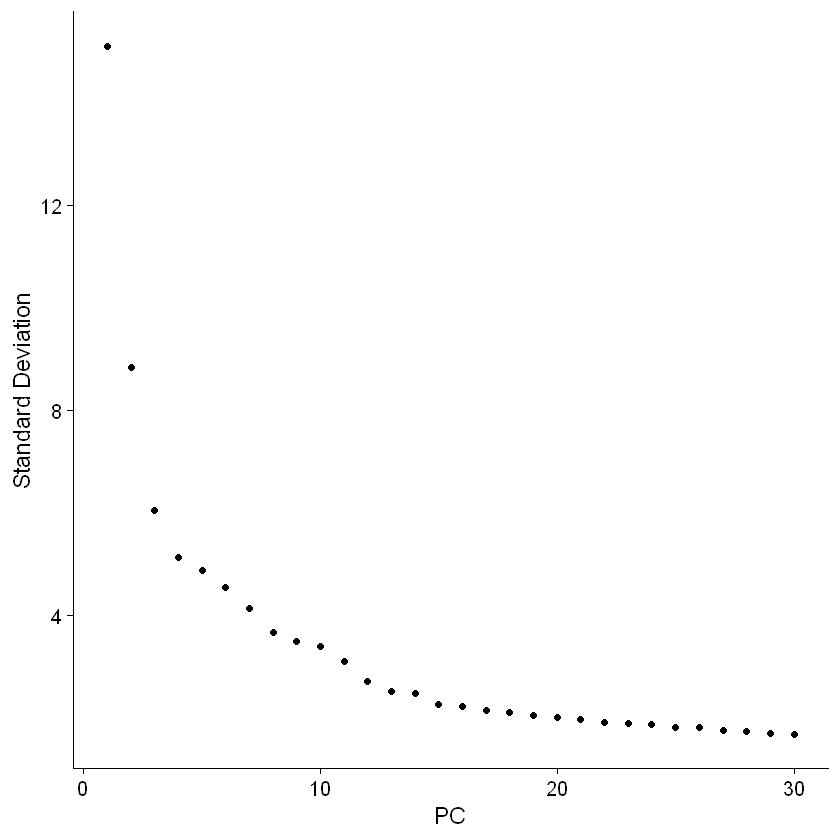

In [10]:

ElbowPlot(integratedList_sample$integrated, ndims=30, reduction = "igpca")


In [11]:

obj.integrated = preprocessIntegrated(integratedList_sample$integrated, "integrated_gex", "libintegration",  resolution=0.5, num.pcs=10, dim.reduction="igpca", with.hto=FALSE)



[1] "Scale Data"
[1] "dim.reduction igpca"
[1] "RunUMAP Data"


19:59:38 UMAP embedding parameters a = 0.9922 b = 1.112

19:59:38 Read 14672 rows and found 10 numeric columns

19:59:38 Using Annoy for neighbor search, n_neighbors = 30

19:59:38 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:59:39 Writing NN index file to temp file C:\Users\mjopp\AppData\Local\Temp\RtmpqeLFiD\file47c47e31b79

19:59:39 Searching Annoy index using 1 thread, search_k = 3000

19:59:43 Annoy recall = 100%

19:59:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

19:59:45 Initializing from normalized Laplacian + noise (using irlba)

19:59:46 Commencing optimization for 200 epochs, with 607300 positive edges

19:59:58 Optimization finished



[1] "FindNeighbors Data"


Computing nearest neighbor graph

Computing SNN



[1] "FindClusters Data"
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14672
Number of edges: 496246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 14
Elapsed time: 1 seconds
[1] "libintegration/dimplot_umap 12 8"
[1] "Saving to file libintegration/dimplot_umap.png"
[1] "Saving to file libintegration/dimplot_umap.pdf"
[1] "Saving to file libintegration/dimplot_umap.svg"
[1] "Saving to file libintegration/dimplot_umap.data"
[1] "libintegration/dimplot_umap_project 24 40"
[1] "Saving to file libintegration/dimplot_umap_project.png"
[1] "Saving to file libintegration/dimplot_umap_project.pdf"
[1] "Saving to file libintegration/dimplot_umap_project.svg"
[1] "Saving to file libintegration/dimplot_umap_project.data"


In [12]:
obj.integrated@reductions$ig.umap = NULL

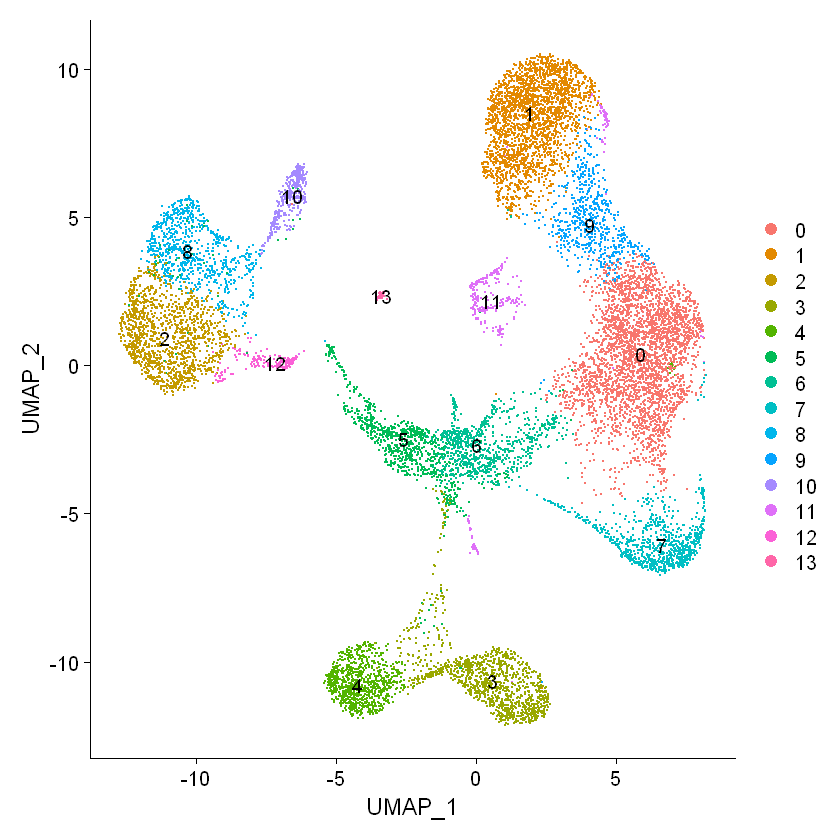

In [13]:
DimPlot(obj.integrated, label=T)

In [14]:

df = read.table("samples2condition.df", header = TRUE)
df[order(df$SampleName),]


,Library,SampleName,patients,Mpoint,Condition
,<int>,<chr>,<chr>,<int>,<chr>
1,1,20094_0001_A_B,1-3,1,SYMPTOMATIC
4,2,20094_0002_A_B,1-3,2,SYMPTOMATIC
7,3,20094_0003_A_B,1-3,3,SYMPTOMATIC
2,4,20094_0004_A_B,4-6,1,ASYMPTOMATIC
5,5,20094_0005_A_B,4-6,2,ASYMPTOMATIC
8,6,20094_0006_A_B,4-6,3,ASYMPTOMATIC
3,7,20094_0007_A_B,7-9,1,SYMPTOMATIC
6,8,20094_0008_A_B,7-9,2,SYMPTOMATIC
9,9,20094_0009_A_B,7-9,3,SYMPTOMATIC


In [15]:

annotateList.sample_condition = list(
  list(name="SYMPTOMATIC", selector="^20094_0001"),
  list(name="SYMPTOMATIC", selector="^20094_0002"),
  list(name="SYMPTOMATIC", selector="^20094_0003"),
  list(name="ASYMPTOMATIC", selector="^20094_0004"),
  list(name="ASYMPTOMATIC", selector="^20094_0005"),
  list(name="ASYMPTOMATIC", selector="^20094_0006"),
  list(name="SYMPTOMATIC", selector="^20094_0007"),
  list(name="SYMPTOMATIC", selector="^20094_0008"),
  list(name="SYMPTOMATIC", selector="^20094_0009"),
  list(name="CONTROL", selector="^20094_0012")

)

obj.integrated = annotateByCellnamePattern( obj.integrated, "condition", annotateList.sample_condition, order=c("CONTROL", "ASYMPTOMATIC", "SYMPTOMATIC"))

annotateList.sample_condition = list(
  list(name="TP 1", selector="^20094_0001"),
  list(name="TP 2", selector="^20094_0002"),
  list(name="TP 3", selector="^20094_0003"),
  list(name="TP 1", selector="^20094_0004"),
  list(name="TP 2", selector="^20094_0005"),
  list(name="TP 3", selector="^20094_0006"),
  list(name="TP 1", selector="^20094_0007"),
  list(name="TP 2", selector="^20094_0008"),
  list(name="TP 3", selector="^20094_0009"),
  list(name="Ctrl", selector="^20094_0012")
)

obj.integrated = annotateByCellnamePattern( obj.integrated, "tp", annotateList.sample_condition, order=c("Ctrl", "TP 1", "TP 2", "TP 3"))



[1] "SYMPTOMATIC TRUE"
[1] "SYMPTOMATIC TRUE"
[1] "SYMPTOMATIC TRUE"
[1] "ASYMPTOMATIC TRUE"
[1] "ASYMPTOMATIC TRUE"
[1] "ASYMPTOMATIC TRUE"
[1] "SYMPTOMATIC TRUE"
[1] "SYMPTOMATIC TRUE"
[1] "SYMPTOMATIC TRUE"
[1] "CONTROL TRUE"
[1] SYMPTOMATIC  ASYMPTOMATIC CONTROL     
Levels: CONTROL ASYMPTOMATIC SYMPTOMATIC
[1] "TP 1 TRUE"
[1] "TP 2 TRUE"
[1] "TP 3 TRUE"
[1] "TP 1 TRUE"
[1] "TP 2 TRUE"
[1] "TP 3 TRUE"
[1] "TP 1 TRUE"
[1] "TP 2 TRUE"
[1] "TP 3 TRUE"
[1] "Ctrl TRUE"
[1] TP 1 TP 2 TP 3 Ctrl
Levels: Ctrl TP 1 TP 2 TP 3


[1] CONTROL      ASYMPTOMATIC SYMPTOMATIC 
Levels: CONTROL ASYMPTOMATIC SYMPTOMATIC
[1] Ctrl TP 1 TP 2 TP 3
Levels: Ctrl TP 1 TP 2 TP 3
[1] "CONTROL_Ctrl"
[1] 3449
[1] "CONTROL_TP 1"
[1] 0
[1] "CONTROL_TP 2"
[1] 0
[1] "CONTROL_TP 3"
[1] 0
[1] "ASYMPTOMATIC_Ctrl"
[1] 0
[1] "ASYMPTOMATIC_TP 1"
[1] 884
[1] "ASYMPTOMATIC_TP 2"
[1] 1202
[1] "ASYMPTOMATIC_TP 3"
[1] 198
[1] "SYMPTOMATIC_Ctrl"
[1] 0
[1] "SYMPTOMATIC_TP 1"
[1] 3024
[1] "SYMPTOMATIC_TP 2"
[1] 3180
[1] "SYMPTOMATIC_TP 3"
[1] 2735
[1] "Finishing Plot"


Warning message:
"Removed 131 rows containing missing values (`geom_point()`)."


[1] "Combining Plots"


Warning message:
"Removed 430 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 35 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 47 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 101 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 161 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 131 rows containing missing values (`geom_point()`)."
Warning message:
"Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned."
Warning message:
"Graphs cannot be horizontally aligned unless the axis parameter is set. Placing graphs unaligned."


[1] "Combining Legend"
[1] "split_dimplot_downsample_no 24 20"
[1] "Saving to file split_dimplot_downsample_no.png"
[1] "Saving to file split_dimplot_downsample_no.pdf"
[1] "Saving to file split_dimplot_downsample_no.svg"
[1] "Saving to file split_dimplot_downsample_no.2.1.data data.frame"
[1] "Saving to file split_dimplot_downsample_no.2.2.data waiver"
[1] "Saving to file split_dimplot_downsample_no.2.3.data waiver"
[1] "Saving to file split_dimplot_downsample_no.2.4.data waiver"
[1] "Saving to file split_dimplot_downsample_no.2.5.data waiver"
[1] "Saving to file split_dimplot_downsample_no.2.6.data data.frame"
[1] "Saving to file split_dimplot_downsample_no.2.7.data data.frame"
[1] "Saving to file split_dimplot_downsample_no.2.8.data data.frame"
[1] "Saving to file split_dimplot_downsample_no.2.9.data waiver"
[1] "Saving to file split_dimplot_downsample_no.2.10.data data.frame"
[1] "Saving to file split_dimplot_downsample_no.2.11.data data.frame"
[1] "Saving to file split_dimplot_dow

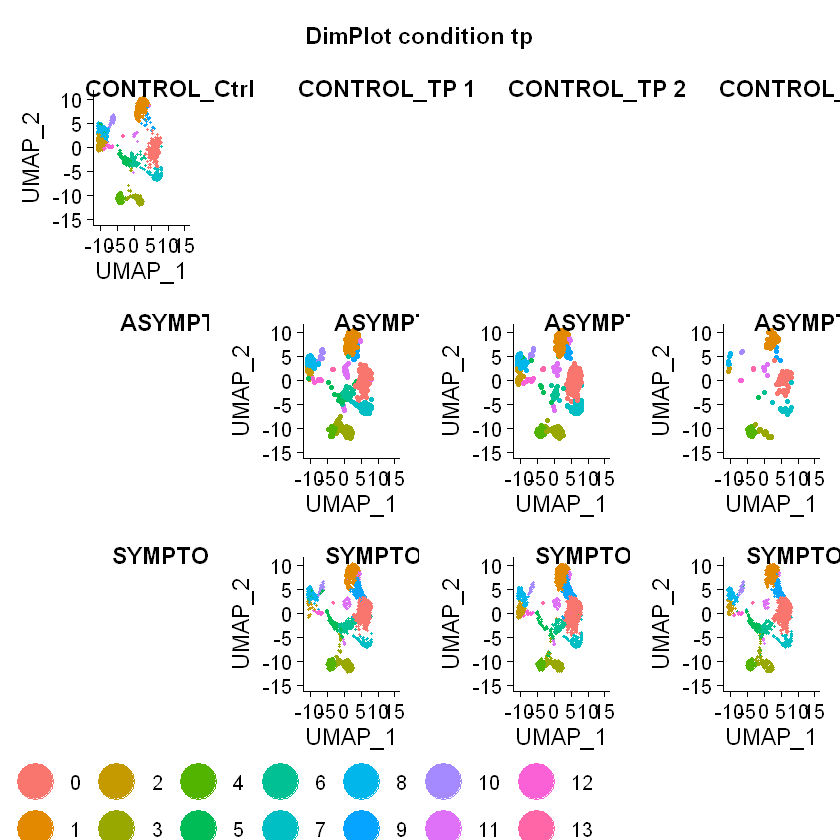

In [16]:
p=makeUMAPPlot(obj.integrated, dim1 = "condition", dim2="tp", group.by="idents", downsample = FALSE)
save_plot(p, "split_dimplot_downsample_no", 24, 20)


[1] CONTROL      ASYMPTOMATIC SYMPTOMATIC 
Levels: CONTROL ASYMPTOMATIC SYMPTOMATIC
[1] Ctrl TP 1 TP 2 TP 3
Levels: Ctrl TP 1 TP 2 TP 3
[1] "Downsampling 198"
[1] "CONTROL_Ctrl"
[1] 198
[1] "CONTROL_TP 1"
[1] 0
[1] "CONTROL_TP 2"
[1] 0
[1] "CONTROL_TP 3"
[1] 0
[1] "ASYMPTOMATIC_Ctrl"
[1] 0
[1] "ASYMPTOMATIC_TP 1"
[1] 198
[1] "ASYMPTOMATIC_TP 2"
[1] 198
[1] "ASYMPTOMATIC_TP 3"
[1] 198
[1] "SYMPTOMATIC_Ctrl"
[1] 0
[1] "SYMPTOMATIC_TP 1"
[1] 198
[1] "SYMPTOMATIC_TP 2"
[1] 198
[1] "SYMPTOMATIC_TP 3"
[1] 198
[1] "Finishing Plot"


Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."


[1] "Combining Plots"


Warning message:
"Removed 30 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 8 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 7 rows containing missing values (`geom_point()`)."
Warning message:
"Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned."
Warning message:
"Graphs cannot be horizontally aligned unless the axis parameter is set. Placing graphs unaligned."


[1] "Combining Legend"
[1] "split_dimplot_downsample 24 20"
[1] "Saving to file split_dimplot_downsample.png"
[1] "Saving to file split_dimplot_downsample.pdf"
[1] "Saving to file split_dimplot_downsample.svg"
[1] "Saving to file split_dimplot_downsample.2.1.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.2.data waiver"
[1] "Saving to file split_dimplot_downsample.2.3.data waiver"
[1] "Saving to file split_dimplot_downsample.2.4.data waiver"
[1] "Saving to file split_dimplot_downsample.2.5.data waiver"
[1] "Saving to file split_dimplot_downsample.2.6.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.7.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.8.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.9.data waiver"
[1] "Saving to file split_dimplot_downsample.2.10.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.11.data data.frame"
[1] "Saving to file split_dimplot_downsample.2.12.data data.frame"


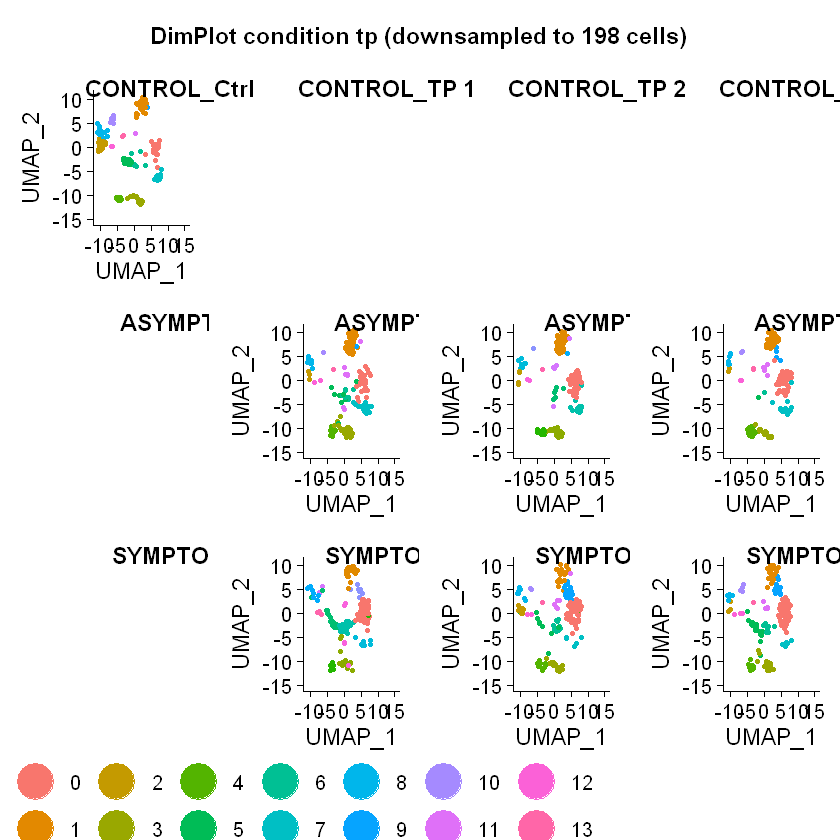

In [17]:
p=makeUMAPPlot(obj.integrated, dim1 = "condition", dim2="tp", group.by="idents", downsample = TRUE)
save_plot(p, "split_dimplot_downsample", 24, 20)



In [18]:

dir.create("libintegration/de")

exprdfTT = makeDEResults(obj.integrated, assay="RNA", test="t")
write.table(exprdfTT, "libintegration/de/expr_test_t.tsv", sep="\t", row.names=F, quote = F)
writexl::write_xlsx(exprdfTT, "libintegration/de/expr_test_t.xlsx")



Warning message in dir.create("libintegration/de"):
"'libintegration\de' already exists"


[1] "Processing cluster 0 with a total of 3412 cells"
[1] FALSE
[1] "Processing cluster 1 with a total of 2517 cells"
[1] FALSE
[1] "Processing cluster 2 with a total of 1399 cells"
[1] FALSE
[1] "Processing cluster 3 with a total of 1223 cells"
[1] FALSE
[1] "Processing cluster 4 with a total of 941 cells"
[1] FALSE
[1] "Processing cluster 5 with a total of 929 cells"
[1] FALSE
[1] "Processing cluster 6 with a total of 910 cells"
[1] FALSE
[1] "Processing cluster 7 with a total of 889 cells"
[1] FALSE
[1] "Processing cluster 8 with a total of 836 cells"
[1] FALSE
[1] "Processing cluster 9 with a total of 656 cells"
[1] FALSE
[1] "Processing cluster 10 with a total of 357 cells"
[1] FALSE
[1] "Processing cluster 11 with a total of 349 cells"
[1] FALSE
[1] "Processing cluster 12 with a total of 191 cells"
[1] FALSE
[1] "Processing cluster 13 with a total of 63 cells"
[1] FALSE
NULL
[1] "0"
[1] "1"
[1] "2"
[1] "3"
[1] "4"
[1] "5"
[1] "6"
[1] "7"
[1] "8"
[1] "9"
[1] "10"
[1] "11"
[1] "12"

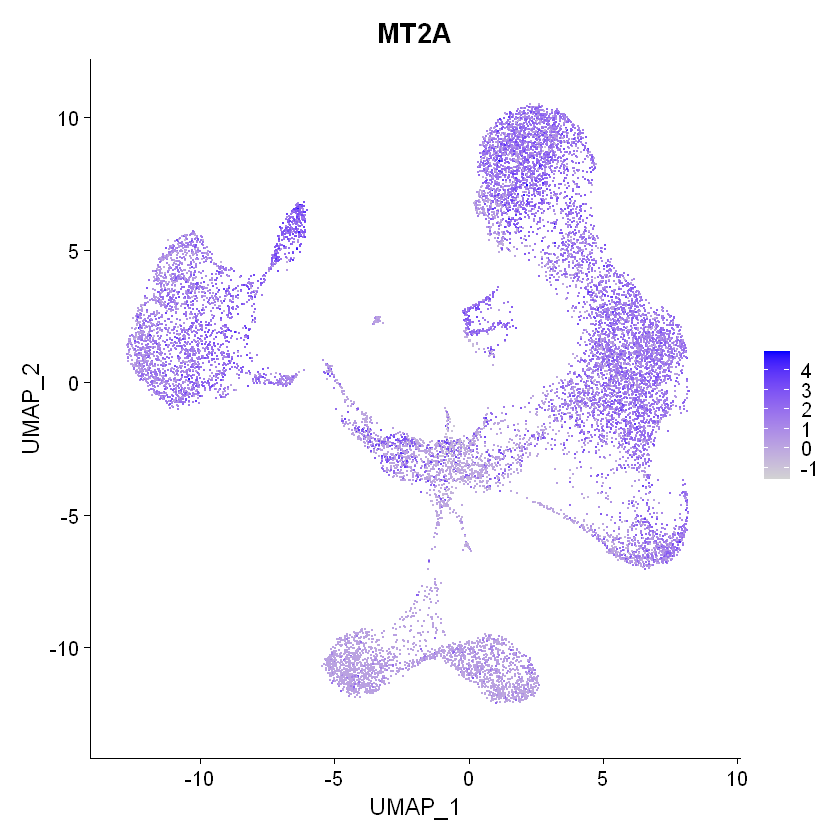

In [19]:
FeaturePlot(obj.integrated, "MT2A")

In [20]:
DefaultAssay(obj.integrated)= "RNA"

isgGenes = c("MT2A", "ISG15", "LY6E", "IFIT1", "IFIT2", "IFIT3", "IFITM1", "IFITM3", "IFI44L", "IFI6", "MX1", "IFI27",  "IFI44L", "RSAD2", "SIGLEC1", "IFIT1", "ISG15")

obj.integrated = AddModuleScore(obj.integrated, features =  isgGenes, name = "isg_score_small")


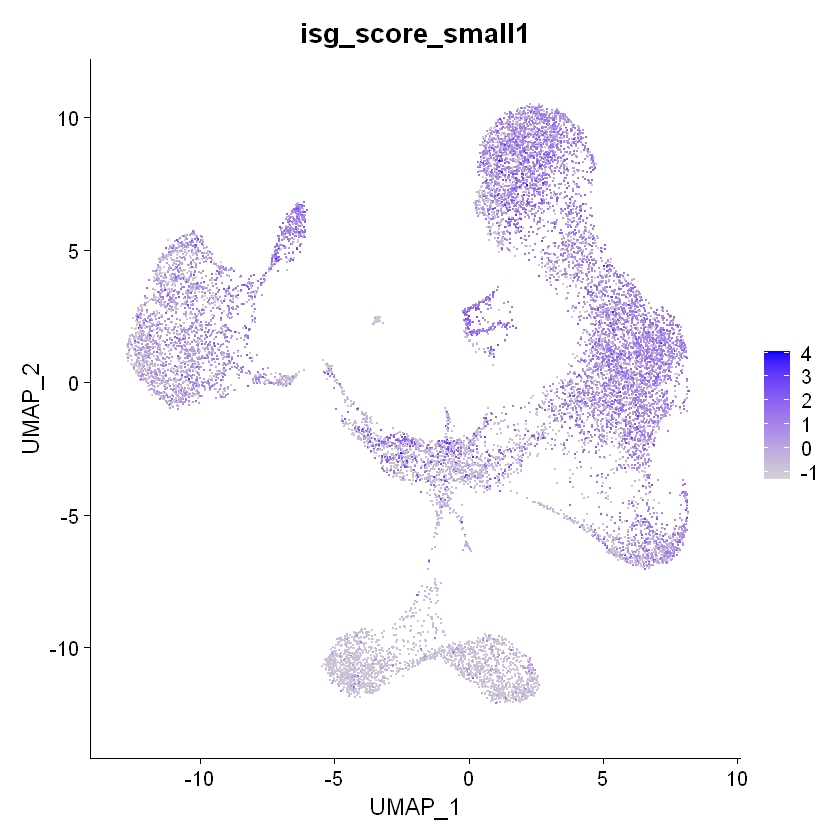

In [21]:
FeaturePlot(obj.integrated, "isg_score_small1")


In [22]:
obj.integrated$cond_tp = paste(obj.integrated$condition, obj.integrated$tp, sep=" ")

[1] "limits -1" "limits 1" 
[1] "7"
[1] 1


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 2


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 3


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 4


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 5


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 6


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] 7


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


[1] "ncol 4"
[1] "split_featureplot_isg 30 15"
[1] "Saving to file split_featureplot_isg.png"
[1] "Saving to file split_featureplot_isg.pdf"
[1] "Saving to file split_featureplot_isg.svg"
[1] "Saving to file split_featureplot_isg.2.1.data data.frame"
[1] "Saving to file split_featureplot_isg.2.2.data data.frame"
[1] "Saving to file split_featureplot_isg.2.3.data data.frame"
[1] "Saving to file split_featureplot_isg.2.4.data data.frame"
[1] "Saving to file split_featureplot_isg.2.5.data data.frame"
[1] "Saving to file split_featureplot_isg.2.6.data data.frame"
[1] "Saving to file split_featureplot_isg.2.7.data data.frame"


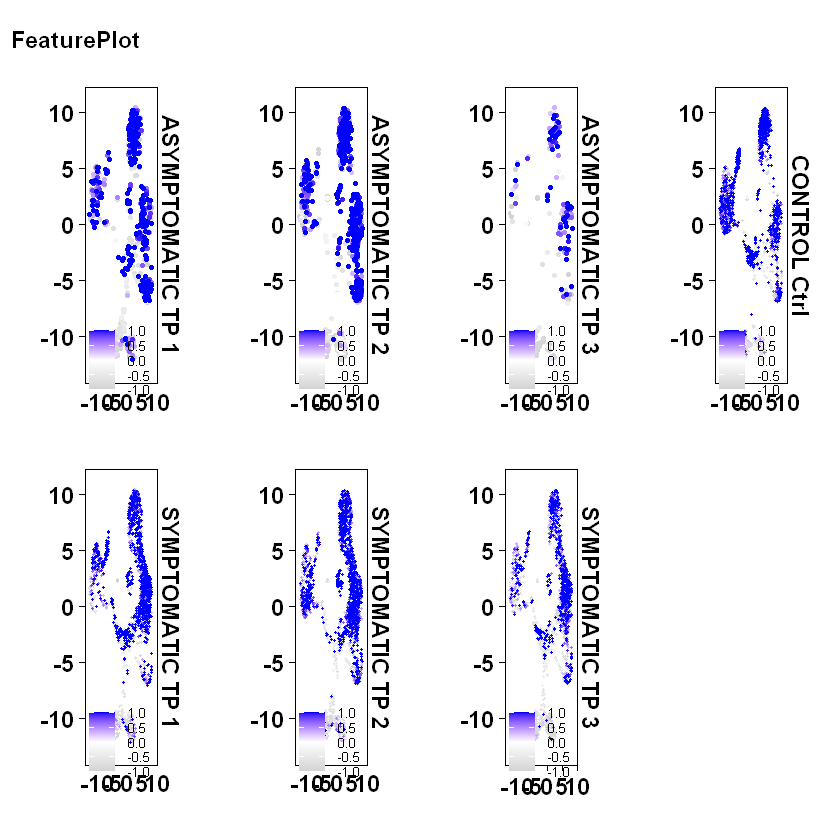

In [23]:
p=splitFeaturePlot(obj.integrated, "isg_score_small1", split.by="cond_tp", title="FeaturePlot", ncol=4)
save_plot(p, "split_featureplot_isg", 30, 15)


[1] "SYMPTOMATIC Ctrl 0"
[1] "Removing group SYMPTOMATIC"
[1] "ASYMPTOMATIC Ctrl 0"
[1] "Removing group ASYMPTOMATIC"
[1] "CONTROL TP 1 0"
[1] "CONTROL TP 2 0"
[1] "CONTROL TP 3 0"
[1] "Removing group CONTROL"
[1] "Existing Cells 14672"
[1] "New Cells 0"
[1] "TP 1" "TP 2" "TP 3" "Ctrl"
[1] "SYMPTOMATIC 3"
[1] "ASYMPTOMATIC 3"
[1] "CONTROL 1"
[1] "TP 1 1.10543539557871"
[1] "TP 2 1.04267403662383"
[1] "TP 3 0.952347915061169"
[1] "Ctrl NA"
[1] "TP 1 1.03600907843311"
[1] "TP 2 1.10322999910783"
[1] "TP 3 1.00194124153661"
[1] "Ctrl NA"
[1] "TP 1 NA"
[1] "TP 2 NA"
[1] "TP 3 NA"
[1] "Ctrl 1.01263554921205"
[1] "Creating Plot"
[1]  3 14
[1] "comparative_violin_isg 12 8"
[1] "Saving to file comparative_violin_isg.png"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg.pdf"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg.svg"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg.data"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


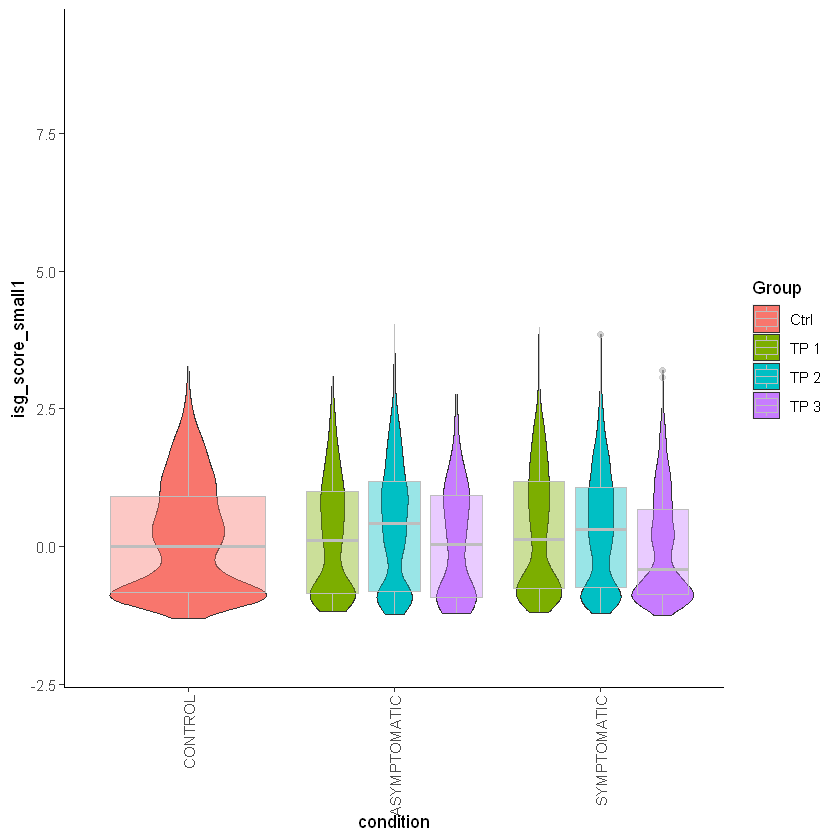

In [24]:

p=comparativeVioBoxPlot(obj.integrated, "isg_score_small1", group.by="condition", split.by="tp", yStepIncrease = 1, verbose=FALSE)
save_plot(p, "comparative_violin_isg", 12, 8)


[1] "SYMPTOMATIC Ctrl 0"
[1] "Removing group SYMPTOMATIC"
[1] "ASYMPTOMATIC Ctrl 0"
[1] "Removing group ASYMPTOMATIC"
[1] "CONTROL TP 1 0"
[1] "CONTROL TP 2 0"
[1] "CONTROL TP 3 0"
[1] "Removing group CONTROL"
[1] "Existing Cells 14672"
[1] "New Cells 0"
[1] "TP 1" "TP 2" "TP 3" "Ctrl"
[1] "SYMPTOMATIC 3"
[1] "ASYMPTOMATIC 3"
[1] "CONTROL 1"
[1] "TP 1 1.10543539557871"
[1] "TP 2 1.04267403662383"
[1] "TP 3 0.952347915061169"
[1] "Ctrl NA"
[1] "TP 1 1.03600907843311"
[1] "TP 2 1.10322999910783"
[1] "TP 3 1.00194124153661"
[1] "Ctrl NA"
[1] "TP 1 NA"
[1] "TP 2 NA"
[1] "TP 3 NA"
[1] "Ctrl 1.01263554921205"
[1] "Creating Plot"
[1]  3 14
[1] "comparative_violin_isg_custom 12 8"
[1] "Saving to file comparative_violin_isg_custom.png"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg_custom.pdf"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg_custom.svg"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


[1] "Saving to file comparative_violin_isg_custom.data"


Warning message:
"Removed 3 rows containing non-finite values (`stat_bracket()`)."


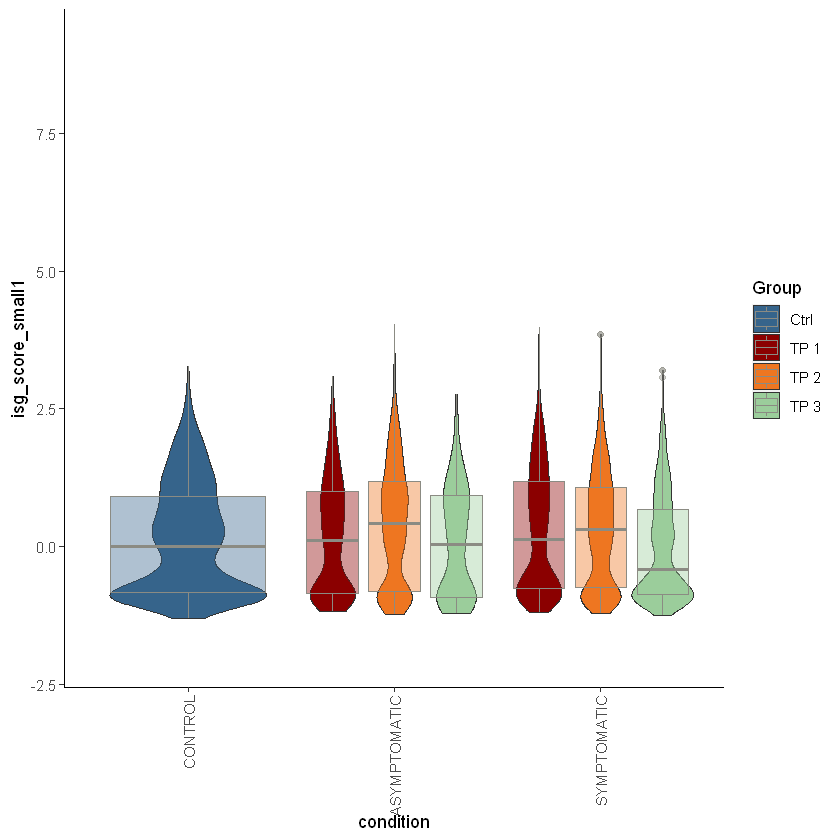

In [25]:

dsrCols = list("Ctrl"="steelblue4", "TP 1"="darkred", "TP 2"="chocolate2", "TP 3"="darkseagreen3")

p=comparativeVioBoxPlot(obj.integrated, "isg_score_small1", group.by="condition", split.by="tp", yStepIncrease = 1, verbose=FALSE, dsrCols = dsrCols, boxplot_grey = "ivory4")
save_plot(p, "comparative_violin_isg_custom", 12, 8)


In [26]:
unique(obj.integrated$condition)

[1] SYMPTOMATIC  ASYMPTOMATIC CONTROL     
Levels: CONTROL ASYMPTOMATIC SYMPTOMATIC

[1] "Existing Cells 2284"
[1] "New Cells 2284"
[1] "TP 1" "TP 2" "TP 3"
[1] "ASYMPTOMATIC 3"
[1] "TP 1 1.03600907843311"
[1] "TP 2 1.10322999910783"
[1] "TP 3 1.00194124153661"
[1] "Creating Plot"
[1]  2 14


Warning message:
"Removed 2 rows containing non-finite values (`stat_bracket()`)."


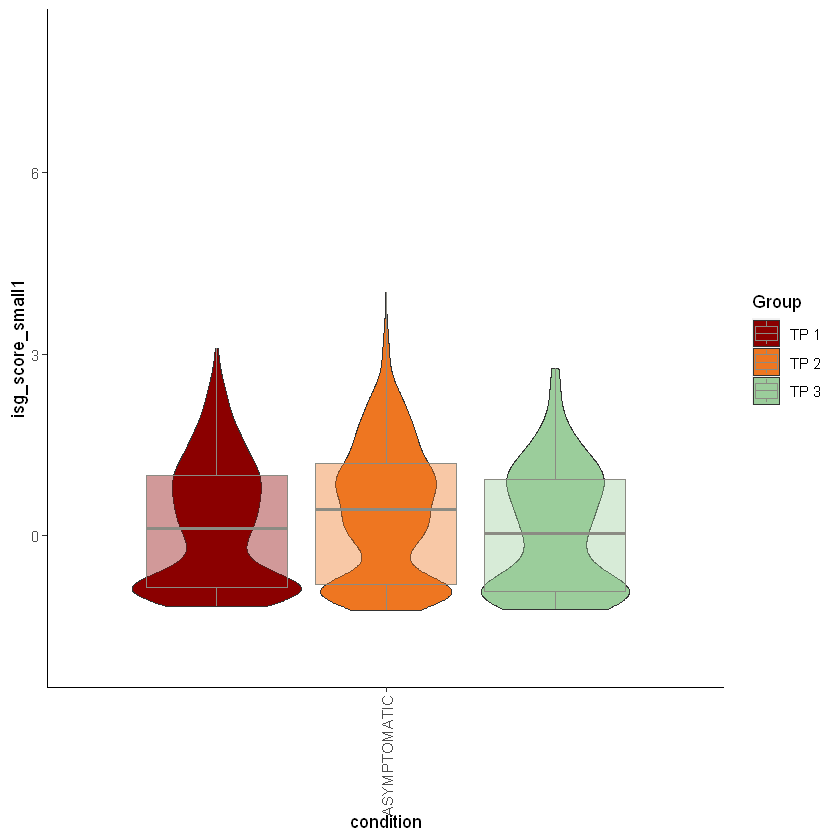

In [27]:

dsrCols = list("Ctrl"="steelblue4", "TP 1"="darkred", "TP 2"="chocolate2", "TP 3"="darkseagreen3")

comparativeVioBoxPlot(subset(obj.integrated, condition=="ASYMPTOMATIC"), "isg_score_small1", group.by="condition", split.by="tp", yStepIncrease = 1, verbose=FALSE, dsrCols = dsrCols, boxplot_grey = "ivory4")


In [28]:
obj.integrated = Seurat::ScaleData(obj.integrated)
obj.integrated


Centering and scaling data matrix



An object of class Seurat 
39601 features across 14672 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 other assay present: integrated_gex
 2 dimensional reductions calculated: igpca, umap

In [43]:
save_plot = function(plotobj, outname, fig.width, fig.height, save.data=TRUE, draw.fun=NULL)
{
  print(paste(outname, fig.width, fig.height))
  
  fname=paste(outname, "png", sep=".")
  print(paste("Saving to file", fname))
  png(filename=fname, width = fig.width, height = fig.height, units = 'in', res = 300)#width = fig.width*100, height=fig.height*100)
  
  if (!is.null(draw.fun))
  {
    plot(plotobj)
  } else {
    draw.fun(plotobj)
  }

  dev.off()
  
  fname=paste(outname, "pdf", sep=".")
  print(paste("Saving to file", fname))
  pdf(file=fname, width = fig.width, height=fig.height)
  if (!draw.obj)
  {
    plot(plotobj)
  } else {
    complexheatmap::draw(plotobj)
  }
  dev.off()
  

  fname=paste(outname, "svg", sep=".")
  print(paste("Saving to file", fname))
  svglite::svglite(file = fname, width = fig.width, height = fig.height)
  if (!draw.obj)
  {
    plot(plotobj)
  } else {
    ComplexHeatmap::draw(plotobj)
  }
  dev.off()
  

  if (save.data)
  {
    if (class(plotobj$data) %in% c("list"))
    {
      print("list case")
      for (i in 1:length(plotobj$data))
      {
        fname = paste(outname,i, "data", sep=".")
        print(paste("Saving to file", fname))
        
        if (class(plotobj$data[[i]]) %in% c("list"))
        {
            print("multi list case")
            for (j in 1:length(plotobj$data[[i]]))
            {
                fname = paste(outname,i, j, "data", sep=".")
                print(paste("Saving to file", fname, class(plotobj$data[[i]][[j]])))

                if (class(plotobj$data[[i]][[j]]) %in% c("list", "waiver"))
                {
                  next()
                }
                write.table(plotobj$data[[i]][[j]], fname, row.names = TRUE, sep="\t")    

            }
        } else {
            
            tryCatch(write.table(plotobj$data[[i]], fname, row.names = TRUE, sep="\t"), error = function(e) NULL)
        }
        
      }
    } else {
      
        fname = paste(outname,"data", sep=".")
        print(paste("Saving to file", fname))

        write.table(plotobj$data, paste(outname, "data", sep="."), row.names = TRUE, sep="\t")
    }
  }
  
  return(plotobj)
}


In [41]:

plotGOIs = list("1"=list("clusters"=c(0), "genes"=isgGenes))

p=enhancedHeatMap(obj.integrated, plotGOIs, group.by="idents", include_all_clusters = TRUE, title="Heatmap of ISG Genes", scale.by="GLOBAL")
save_plot(p, "heatmap_isg_genes", 12, 8, save.data = FALSE, draw.obj=TRUE)

Scaling data GLOBAL[1] "Fetching global scaled average expression"
[1] "combined_lists"
[1] 0
 [1] "MT2A"    "ISG15"   "LY6E"    "IFIT1"   "IFIT2"   "IFIT3"   "IFITM1" 
 [8] "IFITM3"  "IFI44L"  "IFI6"    "MX1"     "IFI27"   "IFI44L"  "RSAD2"  
[15] "SIGLEC1" "IFIT1"   "ISG15"  
[1] "Clusters Missing"
numeric(0)
[1] "Genes Missing"
character(0)
[1] "Adding missing clusters"
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13"
[1] "heatmap_isg_genes 12 8"
[1] "Saving to file heatmap_isg_genes.png"


ERROR: Error in draw(plotobj): could not find function "draw"


In [ ]:

plotGOIs = list("1"=list("clusters"=c(0), "genes"=isgGenes))

p=enhancedHeatMap(obj.integrated, plotGOIs, group.by="idents", include_all_clusters = TRUE, title="Heatmap of ISG Genes", scale.by="ALL")
save_plot(p, "heatmap_isg_genes_ALL", 12, 8, save.data = FALSE)



In [ ]:

p=makeComplexExprHeatmapSplit(obj.integrated, plotGOIs, group.by="idents", split.by="condition", include_all_clusters = TRUE, title="Heatmap of ISG Genes", scale.by="GLOBAL")
save_plot(p, "heatmap_split_isg_genes", 30, 10, save.data = FALSE)



In [ ]:

p=makeComplexExprHeatmapSplit(obj.integrated, plotGOIs, group.by="idents", split.by="condition", include_all_clusters = TRUE, title="Heatmap of ISG Genes", scale.by="ALL")
save_plot(p, "heatmap_split_isg_genes_ALL", 30, 10, save.data = FALSE)



In [ ]:


p=makeComplexExprHeatmapSplit(obj.integrated, plotGOIs, group.by="idents", split.by="condition", include_all_clusters = TRUE, title="Heatmap of ISG Genes", scale.by="GROUP")
save_plot(p, "heatmap_split_isg_genes_GROUP", 30, 10, save.data = FALSE)



In [ ]:

cells.control = cellIDForClusters(obj.integrated, "condition", c("CONTROL"))
cells.symptomatic = cellIDForClusters(obj.integrated, "condition", c("SYMPTOMATIC"))
cells.asymptomatic = cellIDForClusters(obj.integrated, "condition", c("ASYMPTOMATIC"))

plotElems = list()
plotElems[["Control"]] = list(cells=intersect(cells.control, cells.control), label="Control")
plotElems[["Symptomatic"]] = list(cells=intersect(cells.symptomatic,cells.symptomatic), label="Symptomatic")
plotElems[["Asymptomatic"]] = list(cells=intersect(cells.asymptomatic,cells.asymptomatic), label="Asymptomatic")

p=enhancedDotPlot(obj.integrated, plotElems, featureGenes = isgGenes, group.by="idents", title="DotPlot of ISG Genes", scale.by="ALL", rotate.x = T)
save_plot(p, "edotplot_split_isg_genes_ALL", 30, 10, save.data = FALSE)



In [ ]:

p=enhancedDotPlot(obj.integrated, plotElems, featureGenes = isgGenes, group.by="idents", title="DotPlot of ISG Genes", scale.by="GLOBAL", rotate.x = T)
save_plot(p, "edotplot_split_isg_genes_GLOBAL", 30, 10, save.data = FALSE)



In [ ]:

p=enhancedDotPlot(obj.integrated, plotElems, featureGenes = isgGenes, group.by="idents", title="DotPlot of ISG Genes", scale.by="GROUP",rotate.x = T)
save_plot(p, "edotplot_split_isg_genes_GROUP", 30, 10, save.data = FALSE)



In [ ]:

p=enhancedDotPlot(obj.integrated, plotElems, featureGenes = isgGenes, group.by="idents", title="DotPlot of ISG Genes", scale.by="FEATURE", rotate.x=TRUE)
save_plot(p, "edotplot_split_isg_genes_FEATURE", 30, 10, save.data = FALSE)



In [ ]:

cells.tp1 = cellIDForClusters(obj.integrated, "tp", c("TP 1"))

comparison.sympt_asympt = compareCellsByCluster(obj.integrated, intersect(cells.symptomatic, cells.tp1), intersect(cells.asymptomatic, cells.tp1), "symptomatic", "asymptomatic", outfolder="./de", group.by="idents", heatmap.plot=TRUE)


In [ ]:

makeVolcanos(comparison.sympt_asympt, "Comparison Symptomatic vs. Asymptoamtic", "./de_volcanos/sympt_asympt_tp1", FCcutoff=0.25)


In [ ]:

gseResults = performEnrichtmentAnalysis(obj.integrated, comparison.sympt_asympt, "human", "./gse_results.rds")



In [ ]:

makeEnrichmentPlots( gseResults, outfolder = "enrichment_plots/" )

